<a href="https://colab.research.google.com/github/immabridget/Timeseries-models/blob/main/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.3 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
#import libraries
import itertools
from prophet import Prophet
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [ ]:
#get the data
data = pd.read_csv("Data.csv")
data.head(1)

,Date,Amount
0,2-Jan-20,0.002


#Data Transformation

In [ ]:
#Date variable
data.Date = pd.to_datetime(data.Date)
data.Date

0     2020-01-02
1     2020-01-03
2     2020-01-04
3     2020-01-05
4     2020-01-06
         ...    
134   2020-05-15
135   2020-05-16
136   2020-05-17
137   2020-05-18
138   2020-05-19
Name: Date, Length: 139, dtype: datetime64[ns]

In [ ]:
#renaming variable
data = data.rename(columns = {'Amount' : 'y'})
data = data.rename(columns = {'Date' : 'ds'})
data.head(1)

,ds,y
0,2020-01-02,0.002


#holidays

#Training and Test Set

In [ ]:
#Training and test set
test_days = 30
training_set = data.iloc[:-test_days, :]
test_set = data.iloc[-test_days:, :]
test_set.tail(1)

,ds,y
138,2020-05-19,959000.012


#Facebook Prophet

In [ ]:
#Facebook Prophet model
m = Prophet(growth = "linear",
            yearly_seasonality = False,
            weekly_seasonality = True,
            daily_seasonality = True,
            #holidays = holidays,
            seasonality_mode = "additive",
            seasonality_prior_scale = 10,
            #holidays_prior_scale = 10,
            changepoint_prior_scale = 0.05)
#m.add_regressor('workingday')
#m.add_regressor('weathersit')
#m.add_regressor('temp')
#m.add_regressor('atemp')
#m.add_regressor('hum')
#m.add_regressor('windspeed')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/gbmi6haw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/t1cnxsnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18568', 'data', 'file=/tmp/tmpigalr402/gbmi6haw.json', 'init=/tmp/tmpigalr402/t1cnxsnr.json', 'output', 'file=/tmp/tmpigalr402/prophet_modelvkj67qke/prophet_model-20230113113947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:39:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#forecasting 

In [ ]:
#Create Future Dataframe
future = m.make_future_dataframe(periods = len(test_set),
                                 freq = "D")
future.tail(1)

,ds
138,2020-05-19


In [ ]:
#merge regressors
#future = pd.concat([future, data.iloc[:,2:]], axis = 1)
future.tail()

,ds
134,2020-05-15
135,2020-05-16
136,2020-05-17
137,2020-05-18
138,2020-05-19


In [ ]:
#forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,17869.284049,-260940.147842,450017.388368,17869.284049,17869.284049,67828.072926,67828.072926,67828.072926,71498.356277,71498.356277,71498.356277,-3670.283352,-3670.283352,-3670.283352,0.0,0.0,0.0,85697.356975
1,2020-01-03,21461.133237,-159083.808159,551113.869020,21461.133237,21461.133237,178897.720936,178897.720936,178897.720936,71498.356277,71498.356277,71498.356277,107399.364659,107399.364659,107399.364659,0.0,0.0,0.0,200358.854173
2,2020-01-04,25052.982425,-233628.475396,461253.071419,25052.982425,25052.982425,86990.312052,86990.312052,86990.312052,71498.356277,71498.356277,71498.356277,15491.955775,15491.955775,15491.955775,0.0,0.0,0.0,112043.294477
3,2020-01-05,28644.831613,-328212.795224,422367.137924,28644.831613,28644.831613,28493.616297,28493.616297,28493.616297,71498.356277,71498.356277,71498.356277,-43004.739980,-43004.739980,-43004.739980,0.0,0.0,0.0,57138.447911
4,2020-01-06,32236.680806,-298619.789503,448090.248795,32236.680806,32236.680806,60679.314591,60679.314591,60679.314591,71498.356277,71498.356277,71498.356277,-10819.041686,-10819.041686,-10819.041686,0.0,0.0,0.0,92915.995397


In [ ]:
#predictions
predictions_prophet = forecast.yhat[-test_days:].rename("prophet")
predictions_prophet[:5]

109    306202.868999
110    298736.347463
111    272011.251850
112    315452.660691
113    427222.653154
Name: prophet, dtype: float64

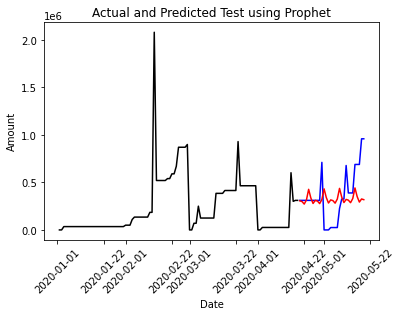

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
y_true = test_set['y'].values
y_pred = forecast['yhat'].values
#mae = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)
# plot expected vs actual
#plt.plot(y_true, label='Actual')
#plt.plot(y_pred, label='Predicted')
sns.lineplot(x=test_set["ds"],y=y_true, color = "blue")
sns.lineplot(x=test_set["ds"],y=predictions_prophet, color = "red")
sns.lineplot(x=training_set["ds"],y=training_set["y"], color = "black")
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title( 'Actual and Predicted Test using Prophet')
#plt.legend()
plt.show()

#Visualization

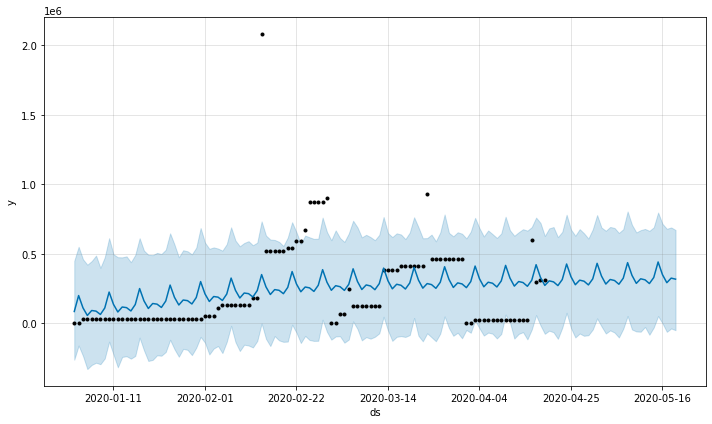

In [ ]:
#visualization forecast
m.plot(forecast);

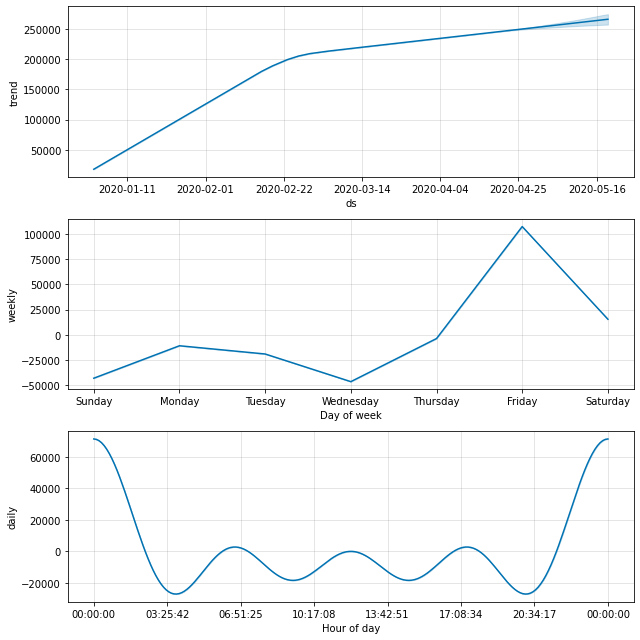

In [ ]:
#plot components
m.plot_components(forecast);

#Model assessment

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_prophet)), 0))

199112.0
271579.0


In [ ]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_prophet)

34.565240593000624

# Cross-Validation

In [ ]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,
                         horizon = '30 days',
                         initial = '60 days',
                         parallel = "processes")
df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2020-03-05 00:00:00 and 2020-03-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fdb552e2d60>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/oq6bjay0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/nf5fd3jb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/uel9c8pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/0bvtk6t4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92944', 'data', 'file=/tmp/tmpigalr402/oq6bjay0.json', 'init=/tmp/tmpigalr402/nf5fd3jb.json', 'output', 'file=/tmp/tmpigalr402/prophet_modeliccd7ep6/prophet_model-20230113115739.csv', 'method=optimize', 'algorithm=newton', '

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-06,800830.905995,469072.051479,1.158289e+06,125000.004,2020-03-05
1,2020-03-07,641791.636687,269653.305759,9.872047e+05,125000.005,2020-03-05
2,2020-03-08,541885.487107,189405.541498,8.976024e+05,125000.006,2020-03-05
3,2020-03-09,550766.977883,198148.160262,9.121884e+05,125000.007,2020-03-05
4,2020-03-10,587426.419559,260005.614349,9.575664e+05,125000.008,2020-03-05


In [ ]:
#MAE and RMSE
print(round(mean_absolute_error(df_cv['y'], df_cv['yhat']),0))
print(round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])), 0))
#print(MAPE(df_cv['y'], df_cv['yhat']))

407828.0
471678.0


#Hyperparameter tuning

In [ ]:
#Parameter grid
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1],
              'holidays_prior_scale': [5, 10, 20]}
grid = ParameterGrid(param_grid)
list(grid)[:3]            

[{'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 5},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 20}]

In [ ]:
#Hyper parameter tuning
rmse = []
for params in grid:
  #build model
  m = Prophet(growth = "linear",
            yearly_seasonality = False,
            weekly_seasonality = True,
            daily_seasonality = True,
            #holidays = holidays,
            seasonality_mode = "additive",
            seasonality_prior_scale = params['seasonality_prior_scale'],
            holidays_prior_scale = params['holidays_prior_scale'],
            changepoint_prior_scale = params['changepoint_prior_scale'])
  #m.add_regressor('workingday')
  #m.add_regressor('weathersit')
  #m.add_regressor('temp')
  #m.add_regressor('atemp')
  #m.add_regressor('hum')
  #m.add_regressor('windspeed')
  m.fit(training_set)

  #cross-validation
  df_cv = cross_validation(m,
                         horizon = '30 days',
                         initial = '60 days',
                         parallel = "processes")
  
  #gather the results
  error = np.sqrt(mean_squared_error(df_cv['y'], 
                                     df_cv['yhat']))
  rmse.append(error)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/u1263j2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/ufyqdgw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23002', 'data', 'file=/tmp/tmpigalr402/u1263j2v.json', 'init=/tmp/tmpigalr402/ufyqdgw3.json', 'output', 'file=/tmp/tmpigalr402/prophet_modelibad5ryu/prophet_model-20230113120426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 2 forecasts with cutoffs between 2020-03-05 00:00:00 and 2020-03-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fdb61493a60>
DEBUG:cmdstanpy:input tempfile: /

In [ ]:
#best parameters
best_params = grid[np.argmin(rmse)]
print(best_params)

{'seasonality_prior_scale': 10, 'holidays_prior_scale': 5, 'changepoint_prior_scale': 0.1}


#Final Prophet Model

In [ ]:
#build model
m = Prophet(growth = "linear",
          yearly_seasonality = False,
          weekly_seasonality = True,
          daily_seasonality = True,
          #holidays = holidays,
          seasonality_mode = "additive",
          seasonality_prior_scale = best_params['seasonality_prior_scale'],
          holidays_prior_scale = best_params['holidays_prior_scale'],
          changepoint_prior_scale = best_params['changepoint_prior_scale'])
#m.add_regressor('workingday')
#m.add_regressor('weathersit')
#m.add_regressor('temp')
#m.add_regressor('atemp')
#m.add_regressor('hum')
#m.add_regressor('windspeed')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/8xy9hkc7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigalr402/o0uktuvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19667', 'data', 'file=/tmp/tmpigalr402/8xy9hkc7.json', 'init=/tmp/tmpigalr402/o0uktuvq.json', 'output', 'file=/tmp/tmpigalr402/prophet_modelngtpd3xx/prophet_model-20230113120808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Create Future Dataframe
future = m.make_future_dataframe(periods = len(test_set),
                                 freq = "D")
#future = pd.concat([future, dataset.iloc[:,2:]],axis = 1)
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      139 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB


In [ ]:
#forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,-12266.537908,-403625.196964,270823.928868,-12266.537908,-12266.537908,-47286.681462,-47286.681462,-47286.681462,-49047.511249,-49047.511249,-49047.511249,1760.829786,1760.829786,1760.829786,0.0,0.0,0.0,-59553.219371
1,2020-01-03,-2962.719266,-300062.939711,355999.747873,-2962.719266,-2962.719266,58535.060631,58535.060631,58535.060631,-49047.511249,-49047.511249,-49047.511249,107582.571880,107582.571880,107582.571880,0.0,0.0,0.0,55572.341365
2,2020-01-04,6341.099377,-352025.464944,317904.399712,6341.099377,6341.099377,-31151.373655,-31151.373655,-31151.373655,-49047.511249,-49047.511249,-49047.511249,17896.137593,17896.137593,17896.137593,0.0,0.0,0.0,-24810.274279
3,2020-01-05,15644.918019,-386724.682881,269793.955095,15644.918019,15644.918019,-88558.011820,-88558.011820,-88558.011820,-49047.511249,-49047.511249,-49047.511249,-39510.500571,-39510.500571,-39510.500571,0.0,0.0,0.0,-72913.093800
4,2020-01-06,24948.736720,-353381.324571,261872.908549,24948.736720,24948.736720,-63356.903486,-63356.903486,-63356.903486,-49047.511249,-49047.511249,-49047.511249,-14309.392238,-14309.392238,-14309.392238,0.0,0.0,0.0,-38408.166766


In [ ]:
#extract predictions
predictions_prophet_tuned = forecast.yhat[-test_days:].rename("prophet_tuned")
predictions_prophet_tuned.index = test_set["ds"]
predictions_prophet_tuned.head()

ds
2020-04-20    161947.488447
2020-04-21    148822.414573
2020-04-22    117203.973090
2020-04-23    164949.983216
2020-04-24    266415.816225
Name: prophet_tuned, dtype: float64

In [ ]:
#MAE and RMSE
print(round(mean_absolute_error(test_set['y'], predictions_prophet_tuned),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_prophet_tuned)), 0))
#print(MAPE(df_cv['y'], df_cv['yhat']))

289478.0
380730.0


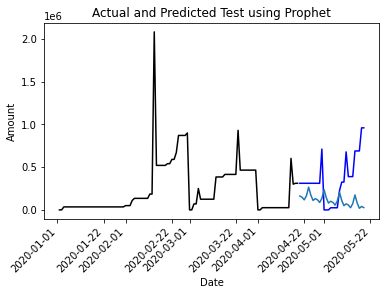

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
y_true = test_set['y'].values
y_pred = forecast['yhat'].values
#mae = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)
# plot expected vs actual
#plt.plot(y_true, label='Actual')
#plt.plot(y_pred, label='Predicted')
sns.lineplot(x=test_set["ds"],y=y_true, color = "blue")
#sns.lineplot(x=test_set["ds"],y=predictions_prophet_tuned, color = "red")
sns.lineplot(x=training_set["ds"],y=training_set["y"], color = "black")
predictions_prophet_tuned.plot()
plt.ylabel('Amount')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title( 'Actual and Predicted Test using Prophet')
#plt.legend()
plt.show()

#export forecasts

In [ ]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [ ]:
predictions_prophet_tuned.to_csv('predictions_prophet_tuned.csv', index = True)